# Importing all Necessary Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

import warnings; warnings.simplefilter('ignore')

# Importing Datasets/show the data frames and shape and data types

In [2]:
credits=pd.read_csv('desktop/tmdb_5000_credits.csv') #read the data set

In [3]:
credits.shape #show the number of columns and rows

(4803, 4)

In [4]:
credits.head(5) #show five firts rows of data frame 

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
credits.dtypes

movie_id     int64
title       object
cast        object
crew        object
dtype: object

In [9]:
movies=pd.read_csv('desktop/tmdb_5000_movies.csv')#read the data set

In [10]:
movies.shape#show the number of columns and rows

(4803, 20)

In [11]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [5]:
movies.head(5) #show five firts rows of data frame 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# changing the genres column from json to string

In [30]:
import json


#do for genres column
movies['genres'] = movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    movies.loc[index,'genres'] = str(list1)


#do for Keywords column
movies['keywords'] = movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords'] = str(list1)
    
#do for Spoken_languages column
    
movies['spoken_languages'] = movies['spoken_languages'].apply(json.loads)
for index,i in zip(movies.index,movies['spoken_languages']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'spoken_languages'] = str(list1)
    
# do for production_companies column
movies['production_companies'] = movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies'] = str(list1)

#do for production_countries column
movies['production_countries'] = movies['production_countries'].apply(json.loads)
for index,i in zip(movies.index,movies['production_countries']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_countries'] = str(list1)
    
    
# do for cast column
credits['cast'] = credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    credits.loc[index,'cast'] = str(list1)




In [32]:
#merge the data sets
movies = movies.merge(credits,left_on='id',right_on='id',how='left')
movies = movies[['id','original_title','genres','cast','vote_average','keywords','production_countries','spoken_languages']]

In [33]:
#removing the spacesfor detecting the genre names
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

# showing a chart for Top Genres

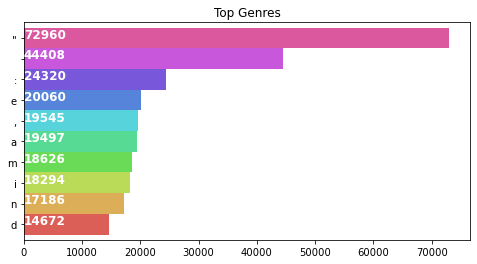

In [65]:

plt.subplots(figsize=(8,4))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=1,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [35]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')

# showing a chart for Actors with highest level of appearance

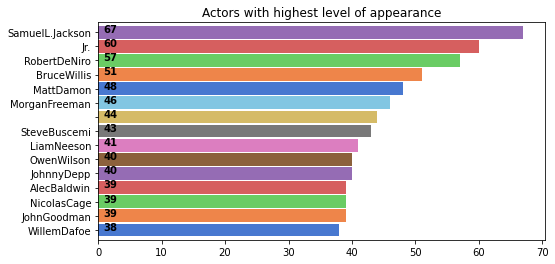

In [36]:
#showing a chart for Actors with highest level of appearance
plt.subplots(figsize=(8,4))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='black',weight='bold')
plt.title('Actors with highest level of appearance')
plt.show()

In [37]:
movies['production_countries'] = movies['production_countries'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['production_countries'] = movies['production_countries'].str.split(',')

# showing a chart for Countries with the highest number of movies

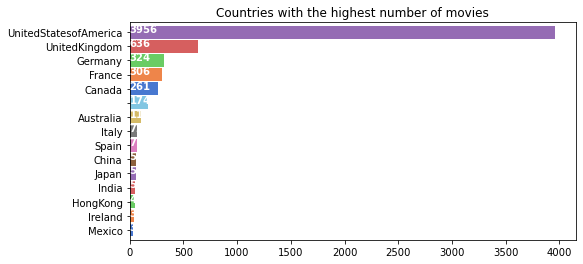

In [38]:
#showing a chart for Countries with the highest number of movies
plt.subplots(figsize=(8,4))
list1=[]
for i in movies['production_countries']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Countries with the highest number of movies')
plt.show()

In [39]:
movies['spoken_languages'] = movies['spoken_languages'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['spoken_languages'] = movies['spoken_languages'].str.split(',')

# showing a chart for Top Spoken Languages in movies

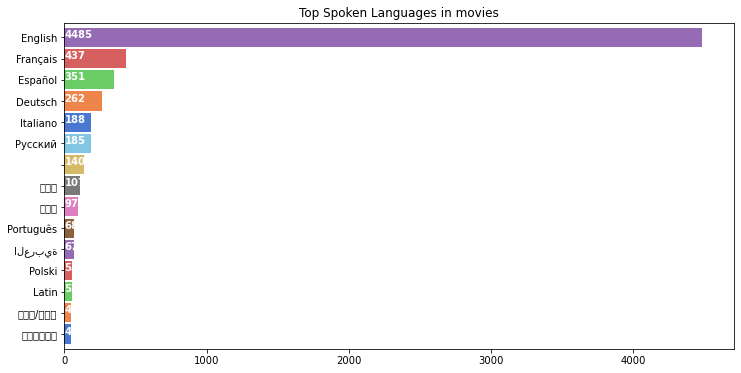

In [40]:
#showing a chart for Top Spoken Languages in movies
plt.subplots(figsize=(12,6))
list1=[]

for i in movies['spoken_languages'] :
    list1.extend(i)
     
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(0.9, i, v,fontsize=10,color='white',weight='bold')
plt.title('Top Spoken Languages in movies')
plt.show()

# Content Based method

I considered a recommendation function that takes a movie title as input and returns a list of the ten most similar films related to that movie. I need a reverse mapping of movie names and a data frame; I create a series to determine the index of a movie in our data frame based on its title. The function should return the movie's index based on its title. The function should get a list of cosine similarity ratings for that movie compared to all other movies.  
The second element is to sort the list of tuples based on the similarity scores and take the top ten items on this list. 




In [41]:
credits=pd.read_csv('desktop/tmdb_5000_credits.csv')

In [42]:
credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [43]:
movies=pd.read_csv('desktop/tmdb_5000_movies.csv')

In [12]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
credits.columns=['id', 'title', 'cast', 'crew']

In [7]:
movies.drop(['title'], axis=1, inplace=True)

In [8]:
movie_merged=pd.merge(credits,movies,on='id')

In [9]:
movie_merged['vote_average'].mean()

6.092171559442011

In [10]:
movie_merged['vote_count'].quantile(q=0.9)

1838.4000000000015

In [11]:
df_filtered=movie_merged[movie_merged['vote_count']>movie_merged['vote_count'].quantile(q=0.9)]

In [12]:
def movie_score(x):
    v=x['vote_count']
    m=movie_merged['vote_count'].quantile(q=0.9)
    R=x['vote_average']
    C=movie_merged['vote_average'].mean()
    return ((R*v)/(v+m))+((C*m)/(v+m))

In [13]:
df_filtered['score']=df_filtered.apply(movie_score, axis=1)

In [14]:
df_highscore=df_filtered.sort_values(by='score', ascending=False).head(10)

In [15]:
df_highscore[['title', 'vote_count', 'vote_average', 'popularity', 'score']]

,title,vote_count,vote_average,popularity,score
1881,The Shawshank Redemption,8205,8.5,136.747729,8.059258
662,Fight Club,9413,8.3,146.757391,7.939256
65,The Dark Knight,12002,8.2,187.322927,7.920020
3232,Pulp Fiction,8428,8.3,121.463076,7.904645
96,Inception,13752,8.1,167.583710,7.863239
3337,The Godfather,5893,8.4,143.659698,7.851236
95,Interstellar,10867,8.1,724.247784,7.809479
809,Forrest Gump,7927,8.2,138.133331,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,123.630332,7.727243
1990,The Empire Strikes Back,5879,8.2,78.517830,7.697884


In [16]:
movie_merged['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [17]:
movie_merged['overview'].fillna(' ', inplace=True)

In [21]:
tfidfv=TfidfVectorizer(analyzer='word', stop_words='english')
tfidfv_matrix=tfidfv.fit_transform(movie_merged['overview'])
print(tfidfv_matrix.todense())
tfidfv_matrix.todense().shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(4803, 20978)

The next procedures are identical to those taken with our Movie Overview Based Recommender. I used CountVectorizer().

Different approaches, such as Euclidean, Pearson, and cosine similarity, can be used to calculate the similarity score. I chose the cosine similarity to calculate a numeric quantity that reflects the similarity between two movies. 
Using the Tfidf Vectorizer, I can calculate the cosine similarity score by taking the dot product. 

In [22]:
cosine_sim1 = linear_kernel(tfidfv_matrix, tfidfv_matrix)

In [23]:
indices=pd.Series(data=list(movie_merged.index), index= movie_merged['title'] )

By using the content_recommendations , and giving the name of our favorite movie as input We can see the top 10 movies related to our favorite movie, and we can choose to watch it after that.

In [26]:
def content_recommendations(title, cosine_sim):
    
    # Get the index of the movie that matches the title
    idx = indices[title]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores=sim_scores[1:11]
    
    # Get the movie indices
    ind=[]
    for (x,y) in sim_scores:
        ind.append(x)
        
    # Return the top 10 most similar movies
    tit=[]
    for x in ind:
        tit.append(movie_merged.iloc[x]['title'])
    return pd.Series(data=tit, index=ind)

# using content_recommendations function for see the similar movies based on content based method

By supplying the updated cosine_sim1 matrix as the second input, we can now reuse our content recommendations method.

In [27]:
content_recommendations('Titanic',cosine_sim1)#show top 10 movies similar to 'Titanic'

1269                                  Raise the Titanic
2143                                         Ghost Ship
2287                         I Can Do Bad All By Myself
770                                       Event Horizon
4287                                            Niagara
3212                                           The Rose
2902                                           Triangle
4228                        The Ballad of Jack and Rose
171     Master and Commander: The Far Side of the World
104                                            Poseidon
dtype: object

In [28]:
content_recommendations('Emma',cosine_sim1)#show top 10 movies similar to 'Emma'

758        Edge of Darkness
4654                    Ink
1835    No Strings Attached
371               The Saint
4594    The Broadway Melody
1646            Alex & Emma
3071              I Am Love
2594                One Day
4658             The Frozen
3076     The House of Mirth
dtype: object

## Collaborative method

In [63]:
from surprise import SVD, Reader, Dataset 
from surprise.model_selection import cross_validate

In [64]:
rating= pd.read_csv('desktop/ratings_small.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [65]:
svd = SVD()#I use the famous SVD algorithm.

In [66]:
reader = Reader()

In [67]:

data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)# Load the ratings_small dataset (download it if needed),

In [68]:
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8936  0.8888  0.8964  0.8973  0.9017  0.8956  0.0043  
MAE (testset)     0.6878  0.6853  0.6902  0.6912  0.6929  0.6895  0.0027  
Fit time          3.82    3.88    3.88    3.87    4.03    3.89    0.07    
Test time         0.08    0.08    0.08    0.08    0.08    0.08    0.00    


{'test_rmse': array([0.89358141, 0.88883398, 0.89641291, 0.8973104 , 0.90171522]),
 'test_mae': array([0.68779827, 0.68533941, 0.6902254 , 0.69120802, 0.69294446]),
 'fit_time': (3.8204169273376465,
  3.8773019313812256,
  3.876232862472534,
  3.8679962158203125,
  4.026050090789795),
 'test_time': (0.08213186264038086,
  0.08419108390808105,
  0.08230972290039062,
  0.08258485794067383,
  0.0823221206665039)}

Root Mean Square Error of 0.897 which is very good. Now train on our dataset.

In [431]:
#sample full trainset
trainset = data.build_full_trainset()

In [432]:
# Train the algorithm on the trainset
svd.fit(trainset)

In bellow it shows the ratings user 5 has given to movies.

In [439]:
rating[rating['userId'] == 5]

,userId,movieId,rating,timestamp
351,5,3,4.0,1163374957
352,5,39,4.0,1163374952
353,5,104,4.0,1163374639
354,5,141,4.0,1163374242
355,5,150,4.0,1163374404
...,...,...,...,...
446,5,35836,4.0,1163374275
447,5,40819,4.5,1163374283
448,5,41566,4.0,1163374144
449,5,41569,4.0,1163374167


We use the algorithm to predict user 5 score for move_id of 529.

In [449]:

svd.predict(uid=5, iid=529, r_ui=None)# predict ratings for the testset

Prediction(uid=5, iid=529, r_ui=None, est=4.233577582243394, details={'was_impossible': False})

In [450]:
# directly grab the estimated ratings for the testset
svd.predict(uid=5, iid=529, r_ui=None).est

4.233577582243394

In [451]:
svd.predict(5, 529, 3)

Prediction(uid=5, iid=529, r_ui=3, est=4.233577582243394, details={'was_impossible': False})

For movie with ID 529, we get an estimated prediction of 4.23. This prediction tries to predict based on just user taste and don’t relate what the movie is.



# Weighted Average

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore')



In [30]:
credits=pd.read_csv('desktop/tmdb_5000_credits.csv')

In [31]:
movies=pd.read_csv('desktop/tmdb_5000_movies.csv')

In [32]:
credits_column_renamed = credits.rename(index=str, columns={"movie_id": "id"})

I make a new data frame called "movies merge" to hold the data from both tables.

In [33]:
movies_merge = movies.merge(credits_column_renamed, on='id')
movies_merge.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [34]:
movies_cleaned= movies_merge.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])

In [35]:
# Calculate all the components based on the formula
v=movies_cleaned['vote_count']
R=movies_cleaned['vote_average']
C=movies_cleaned['vote_average'].mean()
m=movies_cleaned['vote_count'].quantile(0.70)

In [36]:
movies_cleaned['weighted_average']=((R*v)+ (C*m))/(v+m)

In [37]:
movie_sorted_byrank=movies_cleaned.sort_values('weighted_average',ascending=False)
movie_sorted_byrank[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(10)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


# Show the best movies Based on the average number of votes

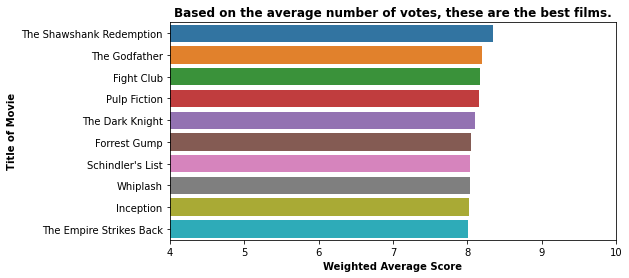

In [63]:

import matplotlib.pyplot as plt
import seaborn as sns

weight_average=movie_sorted_byrank.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(8,4))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['original_title'].head(10), data=weight_average)
plt.xlim(4, 10)
plt.title('Based on the average number of votes, these are the best films.', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Title of Movie', weight='bold')
plt.savefig('best_movies.png')



# Show the most popular movies by vote

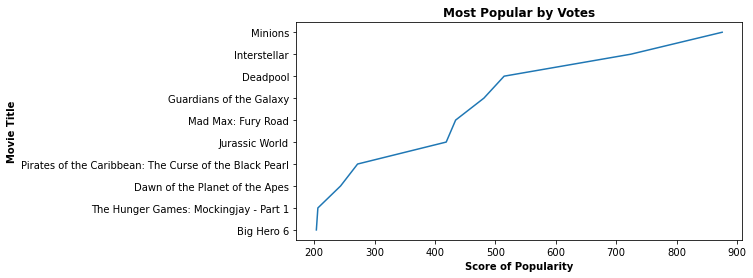

In [61]:

popularity=movie_sorted_byrank.sort_values('popularity',ascending=False)
plt.figure(figsize=(8,4))
ax=sns.lineplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')